# Machine Learning 1

Dataset from Kaggle: **"US Accidents (2016-2021)"** by *Sobhan Moosavi*\
Source: https://www.kaggle.com/sobhanmoosavi/us-accidents \
Description of data available at https://smoosavi.org/datasets/us_accidents.

---

In this ipynb notebook, we perform our Machine Learning part. The following ML models from ```scikit-learn``` are used:

**Regression**
- LinearRegression

**Classification**
- DecisionTreeClassifier
- RandomForestClassifier

**Preprocessing**
- StandardScaler
- OneHotEncoder

**Others**
- Resample
- GridSearchCV


More details on these models at: https://scikit-learn.org/stable/

---

**References**\
Scikit-learn: Machine Learning in Python, Pedregosa *et al.*, JMLR 12, pp. 2825-2830, 2011.

## Data Preparation

We first import the essential python libraries.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

<function seaborn.rcmod.set(*args, **kwargs)>

### A Glance at the Cleaned Dataset

Import the file **us_accident_2016_cleaned.csv** which contains the cleaned data.

In [4]:
us_16_acd=pd.read_csv('us_accident_2016_cleaned.csv')
us_16_acd

,Unnamed: 0,ID,TIME,LATITUDE,LONGITUDE,SIDE,STATE,TEMPERATURE,HUMIDITY,PRESSURE,WIND_SPEED,WEATHER_CONDITION,CROSSING,JUNCTION,TRAFFIC_SIGNAL,DAY_NIGHT,SEVERITY,DISTANCE
0,1,A-2,2016-02-08 05:56:20,39.865420,-84.062800,R,Ohio,36.9,91.0,29.68,7.0,Light Rain,False,False,False,Night,2,1202.176946
1,2,A-3,2016-02-08 06:15:39,39.102660,-84.524680,R,Ohio,36.0,97.0,29.70,7.0,Partly Cloudy,False,True,False,Night,2,88.513700
2,3,A-4,2016-02-08 06:51:45,41.062130,-81.537840,R,Ohio,39.0,55.0,29.65,7.0,Partly Cloudy,False,False,False,Night,2,197.948825
3,4,A-5,2016-02-08 07:53:43,39.172394,-84.492790,R,Ohio,37.0,93.0,29.69,10.4,Light Rain,False,False,False,Day,3,804.670000
4,5,A-6,2016-02-08 08:16:57,39.063240,-84.032430,R,Ohio,35.6,100.0,29.66,8.1,Partly Cloudy,False,False,True,Day,2,2296.528254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114824,137506,A-137507,2016-01-14 20:18:33,40.630608,-75.470604,R,Pennsylvania,31.0,69.0,29.53,3.0,Fair,False,False,False,Night,4,98.169741
114825,150136,A-150137,2016-01-14 20:18:33,40.630608,-75.470604,R,Pennsylvania,31.0,69.0,29.53,3.0,Fair,False,False,False,Night,4,98.169741
114826,150281,A-150282,2016-01-14 20:18:33,40.630608,-75.470604,R,Pennsylvania,31.0,69.0,29.53,3.0,Fair,False,False,False,Night,4,98.169741
114827,158327,A-158328,2016-01-14 20:18:33,40.630608,-75.470604,R,Pennsylvania,31.0,69.0,29.53,3.0,Fair,False,False,False,Night,4,98.169741


Dataset from Kaggle: **"US Accidents (2016-2021)** by *Sobhan Moosavi*\
Source: https://www.kaggle.com/sobhanmoosavi/us-accidents \
Description of data available at https://smoosavi.org/datasets/us_accidents.

> **ID** : This is a unique identifier of the accident record.\
> **TIME** : Shows start time of the accident in local time zone. \
> **LATITUDE** : Shows latitude in GPS coordinate of the start point. \
> **LONGITUDE** : Shows longitude in GPS coordinate of the start point. \
> **SIDE** : Shows the relative side of the street (Right/Left) in address field. \
> **STATE** : Shows the state in address field. \
> **TEMPERATURE** : Shows the temperature (in Fahrenheit). \
> **HUMIDITY** : Shows the humidity (in percentage). \
> **PRESSURE** : Shows the air pressure (in inches). \
> **VISIBILITY** : Shows visibility (in miles). \
> **WIND_SPEED** : Shows wind speed (in miles per hour). \
> **WEATHER_CONDITION** : Shows the weather condition (rain, snow, thunderstorm, fog, etc.) \
> **CROSSING** : A POI annotation which indicates presence of crossing in a nearby location. \
> **JUNCTION** : A POI annotation which indicates presence of junction in a nearby location. \
> **TRAFFIC_SIGNAL** : A POI annotation which indicates presence of traffic_signal in a nearby loction. \
> **DAY_NIGHT** : Shows the period of day (i.e. day or night) based on sunrise/sunset. \
> **SEVERITY** : Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). \
> **DISTANCE** : The length of the road extent affected by the accident (in meters). \

A little more info of our dataset.

In [5]:
print("Data type:\t", type(us_16_acd))
print("Data dims:\t", us_16_acd.shape)

Data type:	 <class 'pandas.core.frame.DataFrame'>
Data dims:	 (114829, 18)


In [6]:
us_16_acd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114829 entries, 0 to 114828
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         114829 non-null  int64  
 1   ID                 114829 non-null  object 
 2   TIME               114829 non-null  object 
 3   LATITUDE           114829 non-null  float64
 4   LONGITUDE          114829 non-null  float64
 5   SIDE               114829 non-null  object 
 6   STATE              114829 non-null  object 
 7   TEMPERATURE        114829 non-null  float64
 8   HUMIDITY           114829 non-null  float64
 9   PRESSURE           114829 non-null  float64
 10  WIND_SPEED         114829 non-null  float64
 11  WEATHER_CONDITION  114829 non-null  object 
 12  CROSSING           114829 non-null  bool   
 13  JUNCTION           114829 non-null  bool   
 14  TRAFFIC_SIGNAL     114829 non-null  bool   
 15  DAY_NIGHT          114829 non-null  object 
 16  SE

The data type has been changed when we reimport the cleaned data. We perform some simple steps as before to change the data type back to what we desire in the data preparation part.

In [7]:
def to_category(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("category")
    
def to_float32(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("float32")
        
def to_datetime64(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("datetime64") 

In [8]:
to_category(us_16_acd, ["ID", "SIDE", "STATE", "WEATHER_CONDITION", "CROSSING", "JUNCTION", "TRAFFIC_SIGNAL", 
                     "DAY_NIGHT", "SEVERITY"])
to_float32(us_16_acd, ["LATITUDE", "LONGITUDE", "TEMPERATURE", "HUMIDITY", "PRESSURE", "WIND_SPEED", "DISTANCE"])
to_datetime64(us_16_acd, "TIME")

In [9]:
us_16_acd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114829 entries, 0 to 114828
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         114829 non-null  int64         
 1   ID                 114829 non-null  category      
 2   TIME               114829 non-null  datetime64[ns]
 3   LATITUDE           114829 non-null  float32       
 4   LONGITUDE          114829 non-null  float32       
 5   SIDE               114829 non-null  category      
 6   STATE              114829 non-null  category      
 7   TEMPERATURE        114829 non-null  float32       
 8   HUMIDITY           114829 non-null  float32       
 9   PRESSURE           114829 non-null  float32       
 10  WIND_SPEED         114829 non-null  float32       
 11  WEATHER_CONDITION  114829 non-null  category      
 12  CROSSING           114829 non-null  category      
 13  JUNCTION           114829 non-null  category

In [10]:
us_16_acd.isnull().sum()

Unnamed: 0           0
ID                   0
TIME                 0
LATITUDE             0
LONGITUDE            0
SIDE                 0
STATE                0
TEMPERATURE          0
HUMIDITY             0
PRESSURE             0
WIND_SPEED           0
WEATHER_CONDITION    0
CROSSING             0
JUNCTION             0
TRAFFIC_SIGNAL       0
DAY_NIGHT            0
SEVERITY             0
DISTANCE             0
dtype: int64

The data is now ready to be used in our machine learning part.

## Multi-variate Linear Regression

First, we perform ```LinearRegression``` to find out the relationship between the numeric predictors with the numeric response variable, ```Distance```. A summary is shown below.
- Response Variable : ```Distance```
- Predictors (numeric) : ```TEMPERATURE```, ```HUMIDITY```, ```PRESSURE```, ```WIND_SPEED```

To be exact, we are now doing **Ordinary least squares Linear Regression**. ```LinearRegression``` fits a linear model with coefficients w = (w1, …, wp) to *minimize* the *residual sum of squares* between the observed targets in the dataset, and the targets predicted by the *linear approximation*.\
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Import the essential libraries.

> train_test_split: Split arrays or matrices into random train and test subsets.\
> LinearRegression: Ordinary least squares Linear Regression.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
y = pd.DataFrame(us_16_acd["DISTANCE"])
X = pd.DataFrame(us_16_acd[["TEMPERATURE", "HUMIDITY", "PRESSURE", "WIND_SPEED"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

Create a ```LinearRegression``` object. Fit the model using the **train** data.

In [13]:
linreg=LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [3606.476]
Coefficients of Regression 	: a =  [[ -3.133668     0.15309963 -86.63342     -0.86040384]]



A glance at the coefficients for each predictors in the model trained.

In [14]:
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

    Predictors  Coefficients
0  TEMPERATURE     -3.133668
1     HUMIDITY      0.153100
2     PRESSURE    -86.633423
3   WIND_SPEED     -0.860404



Predict the **train** and **test** data using the model we trained just now. Plot the graph for a better visualization.

In [15]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

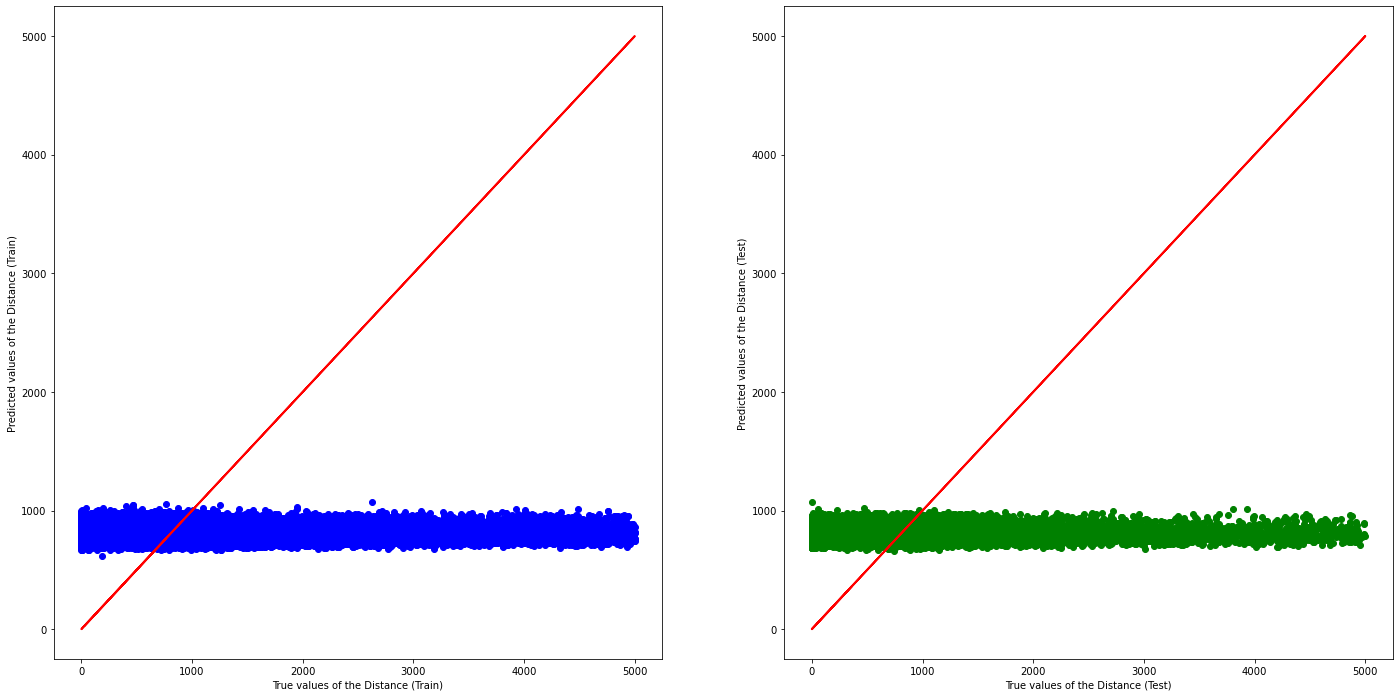

In [16]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Distance (Train)")
axes[0].set_ylabel("Predicted values of the Distance (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Distance (Test)")
axes[1].set_ylabel("Predicted values of the Distance (Test)")
plt.show()

Compute the metrics so that we can justify the goodness of fit of our model.

In [15]:
from sklearn.metrics import mean_squared_error

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.003484353813773433
Mean Squared Error (MSE) 	: 728035.6

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.004350260008535556
Mean Squared Error (MSE) 	: 721008.9



We see that the **Explained Variance** for both train and test data are very low, which is extremely not ideal. At the same time, the **Mean Squared Error** are quite high.

Let us try using the ```StandardScaler``` from ```sklearn``` to standardize the features. ```StandardScaler``` standardizes a feature by subtracting the mean and then scaling to unit variance. We start by importing the library needed.
> StandardScaler: Standardize features by removing the mean and scaling to unit variance.

We then create a ```StandardScaler``` object and fit our dataset.

In [16]:
from sklearn.preprocessing import StandardScaler

us_16_acd_ss=us_16_acd[["TEMPERATURE", "HUMIDITY", "PRESSURE", "WIND_SPEED", "DISTANCE"]]

scaler=StandardScaler()
us_16_acd_ss=scaler.fit_transform(us_16_acd_ss)

In [17]:
us_16_acd_ss_df = pd.DataFrame(us_16_acd_ss, columns = ["TEMPERATURE", "HUMIDITY", "PRESSURE", 
                                                        "WIND_SPEED", "DISTANCE"])

After performing ```StandardScaler``` on our data, we are ready to rebuild our ```LinearRegression``` model. The steps are exactly the same as what we did just now.

In [18]:
y1 = pd.DataFrame(us_16_acd_ss_df["DISTANCE"])
X1 = pd.DataFrame(us_16_acd_ss_df[["TEMPERATURE", "HUMIDITY", "PRESSURE", "WIND_SPEED"]])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2) #split the data into train:test=8:2

In [19]:
linreg1=LinearRegression()
linreg1.fit(X1_train, y1_train)

print('Intercept of Regression \t: b = ', linreg1.intercept_)
print('Coefficients of Regression \t: a = ', linreg1.coef_)
print()

Intercept of Regression 	: b =  [-0.00038165]
Coefficients of Regression 	: a =  [[-0.06001475  0.00340115 -0.01779519 -0.00668729]]



In [20]:
print(pd.DataFrame(list(zip(X1_train.columns, linreg1.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

    Predictors  Coefficients
0  TEMPERATURE     -0.060015
1     HUMIDITY      0.003401
2     PRESSURE     -0.017795
3   WIND_SPEED     -0.006687



In [21]:
y1_train_pred = linreg1.predict(X1_train)
y1_test_pred = linreg1.predict(X1_test)

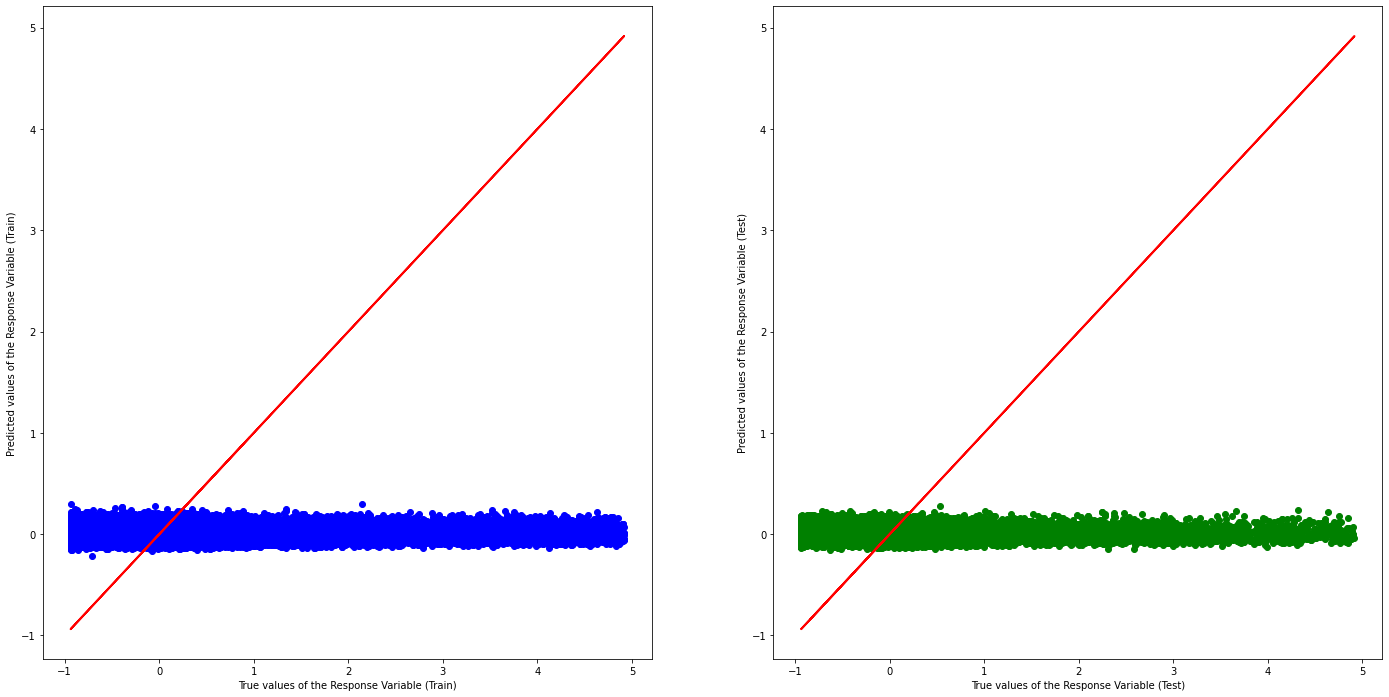

In [22]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y1_train, y1_train_pred, color = "blue")
axes[0].plot(y1_train, y1_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Distance (Train)")
axes[0].set_ylabel("Predicted values of the Distance (Train)")
axes[1].scatter(y1_test, y1_test_pred, color = "green")
axes[1].plot(y1_test, y1_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Distance (Test)")
axes[1].set_ylabel("Predicted values of the Distance (Test)")
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X1_train, y1_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_train, y1_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X1_test, y1_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_test, y1_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.003483623760206056
Mean Squared Error (MSE) 	: 0.9970338

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.00437004665310603
Mean Squared Error (MSE) 	: 0.9935582



The **Goodness of Fit** of our data is more or less still as before, which is very low. Generally, we see that ```StandardScaler``` does not really affect our distributions. Instead, it only reduces our numerical values of data.

We can see that the ```LinearRegression``` model is extremely not ideal for our prediction. In fact, it is more or less expected when we see the low goodness of fit of the model since as we can see form the EDA part, the numerical predictors have very low correlation with the response variable,distance. 

From now on, we will just focus on one response variable, ```SEVERITY```, which is a categorical data. We are going to start with ```DecisionTreeClassifier```, followed by ```RandomForestClassifier```. We will then use **cross-validation technique** to improve model. In between, we will be using ```OneHotEncoder``` and ```resample``` to facilitate our model building.

Before we start with **Classification**, we want to encode our categorical predictors so that we can fit them into our model for better prediction. Therefore, next on we are using ```OneHotEncoder``` to perform this step.

## OneHotEncoder (encode categorical variables)

This model encodes categorical features as a one-hot numeric array. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

More details at: 
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

Import the essential libraries.

> OneHotEncoder: Encode categorical features as a one-hot numeric array.

We create a ```OneHotEncoder``` object and fit it using our data. Below shows the data types of the initial categorical variables after encoding.

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

us_16_acd_cat=us_16_acd[["SIDE", "STATE", "WEATHER_CONDITION", "CROSSING", "JUNCTION", "TRAFFIC_SIGNAL", "DAY_NIGHT"]]
ohe.fit(us_16_acd_cat)
us_16_acd_cat_ohe=pd.DataFrame(ohe.transform(us_16_acd_cat).toarray(), 
                               columns=ohe.get_feature_names_out(us_16_acd_cat.columns))

us_16_acd_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114829 entries, 0 to 114828
Data columns (total 75 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   SIDE_L                           114829 non-null  float64
 1   SIDE_R                           114829 non-null  float64
 2   STATE_Alabama                    114829 non-null  float64
 3   STATE_Arizona                    114829 non-null  float64
 4   STATE_Arkansas                   114829 non-null  float64
 5   STATE_California                 114829 non-null  float64
 6   STATE_Colorado                   114829 non-null  float64
 7   STATE_Connecticut                114829 non-null  float64
 8   STATE_Delaware                   114829 non-null  float64
 9   STATE_District of Columbia       114829 non-null  float64
 10  STATE_Florida                    114829 non-null  float64
 11  STATE_Georgia                    114829 non-null  float64
 12  ST

We then concatenate the numeric variables, encoded categorical variables, and our response variables together into a single dataframe.

In [25]:
us_16_acd_num=us_16_acd[["TEMPERATURE", "HUMIDITY", "PRESSURE", "WIND_SPEED"]]
us_16_acd_rspd=us_16_acd["SEVERITY"]

us_16_acd_ohe=pd.concat([us_16_acd_num, us_16_acd_cat_ohe, us_16_acd_rspd],
                       sort=False, axis=1).reindex(index=us_16_acd_num.index)

us_16_acd_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114829 entries, 0 to 114828
Data columns (total 80 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   TEMPERATURE                      114829 non-null  float32 
 1   HUMIDITY                         114829 non-null  float32 
 2   PRESSURE                         114829 non-null  float32 
 3   WIND_SPEED                       114829 non-null  float32 
 4   SIDE_L                           114829 non-null  float64 
 5   SIDE_R                           114829 non-null  float64 
 6   STATE_Alabama                    114829 non-null  float64 
 7   STATE_Arizona                    114829 non-null  float64 
 8   STATE_Arkansas                   114829 non-null  float64 
 9   STATE_California                 114829 non-null  float64 
 10  STATE_Colorado                   114829 non-null  float64 
 11  STATE_Connecticut                114829 non-null  fl

Export the encoded dataset so that we can use it later.

In [26]:
us_16_acd_ohe.to_csv('us_16_acd_ohe.csv', index=False)

## DecisionTreeClassifier (initial data)

Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions.

More details at:
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

We are going to use all the predictors we have to predict the level of ```SEVERITY``` of accident.

Import the essential libraries.

> train_test_split: Split arrays or matrices into random train and test subsets.\
> DecisionTreeClassifier: A decision tree classifier.\
> plot_tree: Plot a decision tree.\
> confusion_matrix: Compute confusion matrix to evaluate the accuracy of a classification.\

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [28]:
y = pd.DataFrame(us_16_acd_ohe["SEVERITY"])
X = pd.DataFrame(us_16_acd_ohe.drop("SEVERITY", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

Create a ```DecisionTreeClassifier``` object with **max_depth of 4**. Fit the model using the **train** data.

In [29]:
dectree=DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Plot out the tree.

[Text(0.5, 0.9, 'STATE_California <= 0.5\ngini = 0.436\nsamples = 91863\nvalue = [66403, 16360, 9100]\nclass = 2'),
 Text(0.25, 0.7, 'DAY_NIGHT_Day <= 0.5\ngini = 0.494\nsamples = 65559\nvalue = [43896, 13390, 8273]\nclass = 2'),
 Text(0.125, 0.5, 'SIDE_R <= 0.5\ngini = 0.603\nsamples = 17673\nvalue = [9510, 4524, 3639]\nclass = 2'),
 Text(0.0625, 0.3, 'STATE_Illinois <= 0.5\ngini = 0.62\nsamples = 2017\nvalue = [775, 326, 916]\nclass = 4'),
 Text(0.03125, 0.1, 'gini = 0.586\nsamples = 1737\nvalue = [666, 194, 877]\nclass = 4'),
 Text(0.09375, 0.1, 'gini = 0.607\nsamples = 280\nvalue = [109, 132, 39]\nclass = 3'),
 Text(0.1875, 0.3, 'STATE_Texas <= 0.5\ngini = 0.587\nsamples = 15656\nvalue = [8735, 4198, 2723]\nclass = 2'),
 Text(0.15625, 0.1, 'gini = 0.578\nsamples = 13678\nvalue = [7865, 3226, 2587]\nclass = 2'),
 Text(0.21875, 0.1, 'gini = 0.56\nsamples = 1978\nvalue = [870, 972, 136]\nclass = 3'),
 Text(0.375, 0.5, 'STATE_Texas <= 0.5\ngini = 0.441\nsamples = 47886\nvalue = [34386,

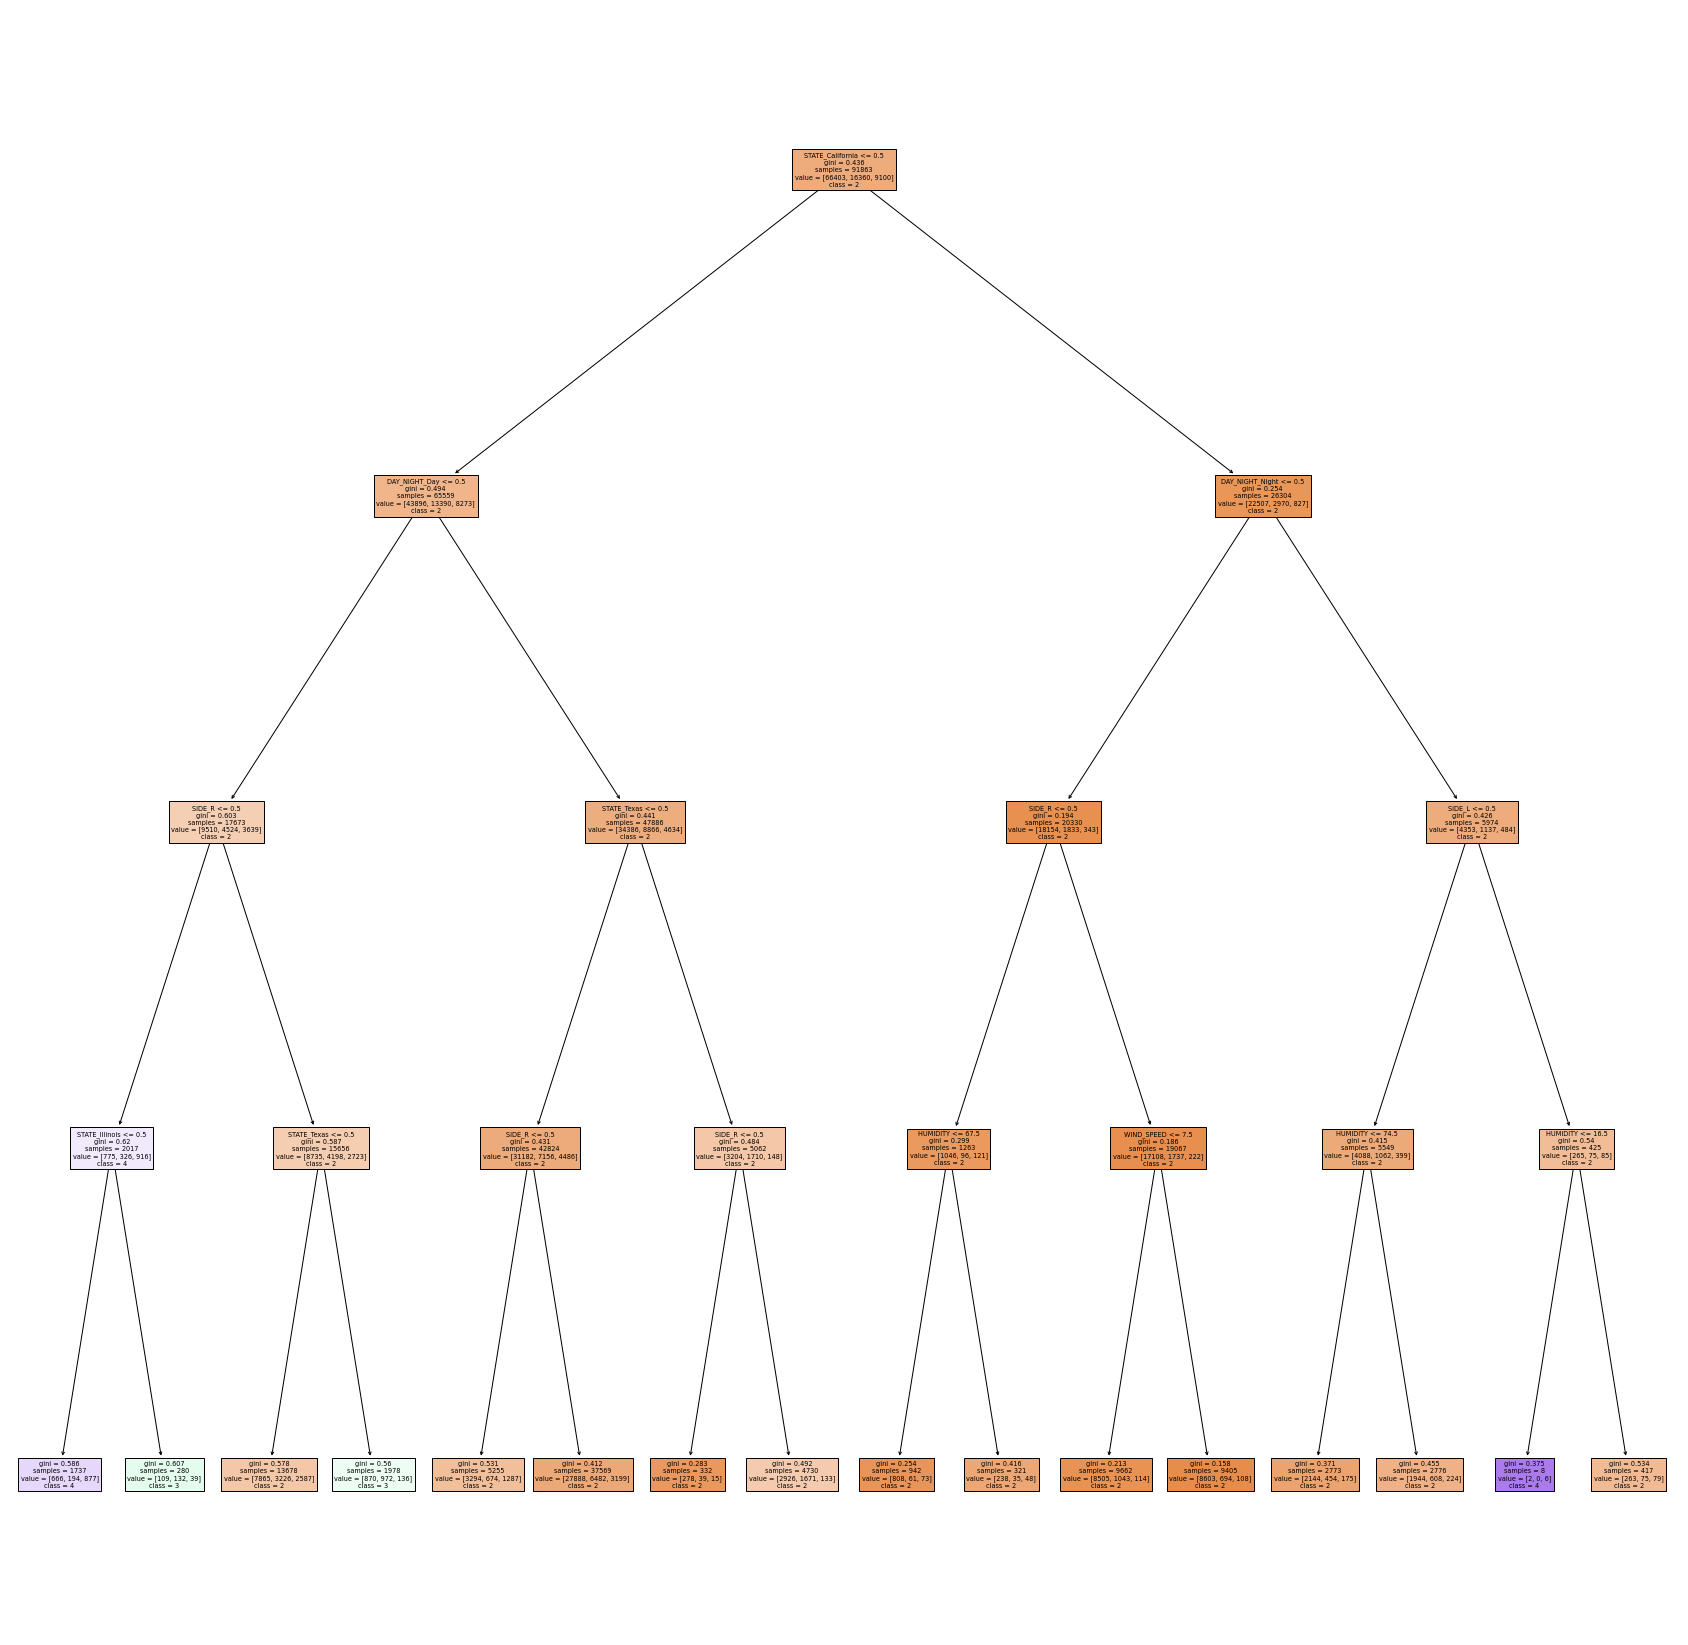

In [30]:
f=plt.figure(figsize=(30,30))
plot_tree(dectree, filled=True, feature_names=X_train.columns, class_names=["2", "3", "4"])

Note that we do not have class 1 here as from the data visualization part we know that there is no data of class 1 for 2016 data.

Predict the **train** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual 2   |  True 2   |  False 2  |   False 2   |             
| Actual 3   |  False 3  |  True 3   |   False 3   |  
| Actual 4   |  False 4  |  False 4  |   True 4    |    
|                   | Predicted 2 | Predicted 3 | Predicted 4 |  

<AxesSubplot:>

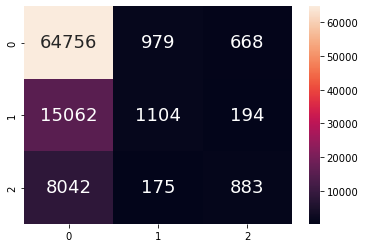

In [31]:
y_train_pred = dectree.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [32]:
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_2=cmTrain[0][0]
true_3=cmTrain[1][1]
true_4=cmTrain[2][2]
false_2=cmTrain[0][1]+cmTrain[0][2]
false_3=cmTrain[1][0]+cmTrain[1][2]
false_4=cmTrain[2][0]+cmTrain[2][1]

print("True 2 Train :\t", (true_2/(true_2 + false_2)))
print("False 2 Train :\t", (false_2/(true_2 + false_2)))
print()

print("True 3 Train :\t", (true_3/(true_3 + false_3)))
print("False 3 Train :\t", (false_3/(true_3 + false_3)))
print()

print("True 4 Train :\t", (true_4/(true_4 + false_4)))
print("False 4 Train :\t", (false_4/(true_4 + false_4)))
print()

Train Data
Accuracy  :	 0.7265493180061614

True 2 Train :	 0.9751969037543484
False 2 Train :	 0.02480309624565155

True 3 Train :	 0.06748166259168704
False 3 Train :	 0.9325183374083129

True 4 Train :	 0.09703296703296703
False 4 Train :	 0.902967032967033



Predict the **test** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual 2   |  True 2   |  False 2  |   False 2   |             
| Actual 3   |  False 3  |  True 3   |   False 3   |  
| Actual 4   |  False 4  |  False 4  |   True 4    |    
|                   | Predicted 2 | Predicted 3 | Predicted 4 |  


<AxesSubplot:>

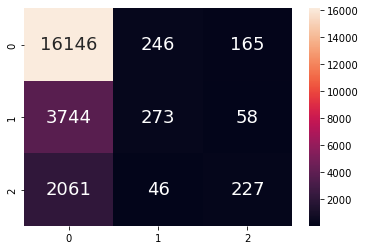

In [33]:
y_test_pred = dectree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [34]:
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_2_test=cmTest[0][0]
true_3_test=cmTest[1][1]
true_4_test=cmTest[2][2]
false_2_test=cmTest[0][1]+cmTest[0][2]
false_3_test=cmTest[1][0]+cmTest[1][2]
false_4_test=cmTest[2][0]+cmTest[2][1]

print("True 2 Test :\t", (true_2_test/(true_2_test + false_2_test)))
print("False 2 Test :\t", (false_2_test/(true_2_test + false_2_test)))
print()

print("True 3 Test :\t", (true_3_test/(true_3_test + false_3_test)))
print("False 3 Test :\t", (false_3_test/(true_3_test + false_3_test)))
print()

print("True 4 Test :\t", (true_4_test/(true_4_test + false_4_test)))
print("False 4 Test :\t", (false_4_test/(true_4_test + false_4_test)))
print()

Test Data
Accuracy  :	 0.7248105895671862

True 2 Test :	 0.9751766624388476
False 2 Test :	 0.024823337561152382

True 3 Test :	 0.06699386503067485
False 3 Test :	 0.9330061349693252

True 4 Test :	 0.0972579263067695
False 4 Test :	 0.9027420736932305



We notice an extremely high true rate for class 2, but also extremely high false rate for class 3 and 4. This situation occurs in both of our train and test data. This might be caused by the highly imbalanced classes of our data. We will try to improve the prediction using resampling technique. One thing to note is although the accuracy being around 0.70, we should not be too satisfied with the current model because it is biased towards class 2.

## Resample

### Imbalanced Data

A classification data set with skewed class proportions is called **imbalanced**. Classes that make up a large proportion of the data set are called **majority classes**. Those that make up a smaller proportion are **minority classes**.

What counts as imbalanced? The answer could range from mild to extreme, as the table below shows.

| Degree of Imbalance | Proportion of Minority Class |
| :------------------ | ----------------------------:|
| Mild                | 20-40% of the data set       |
| Moderate            | 1-20% of the data set        |
| Extreme             | <1% of the data set          |

More details at: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

In [35]:
us_16_acd_ohe["SEVERITY"].value_counts()

2    82960
3    20435
4    11434
Name: SEVERITY, dtype: int64

Our ```SEVERITY``` classes are likely to fall in the moderate category.

### Resample - Upsampling

The model resamples arrays or sparse matrices in a consistent way. Here, we use it to upsample our sizes of ```SEVERITY``` level 3 and 4 to the size of level 2. By applying this step, we solve the issue of the biased data. However, it might affect our prediction accuracy. We will solve the new issue in a later part.\
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

Note that we are using the ```scikit-learn.utils``` ```resample``` instead of the ```resample``` from ```pandas``` library, which mainly works on time-series data.

Import the essential library.

> resample: Resample arrays or sparse matrices in a consistent way.

In [36]:
from sklearn.utils import resample

We separate the data into their respective levels of ```SEVERITY```. We then resample them to the size of ```SEVERITY``` level 2.

In [37]:
sev2 = us_16_acd_ohe[us_16_acd_ohe.SEVERITY == 2]
sev3 = us_16_acd_ohe[us_16_acd_ohe.SEVERITY == 3]
sev4 = us_16_acd_ohe[us_16_acd_ohe.SEVERITY == 4]

In [38]:
sev3_up = resample(sev3, replace=True, n_samples=sev2.shape[0])
sev4_up = resample(sev4, replace=True, n_samples=sev2.shape[0])

Upon completing the resample process, we concatenate the data back.

In [39]:
us_16_acd_ohe_up = pd.concat([sev2, sev3_up, sev4_up])
us_16_acd_ohe_up["SEVERITY"].value_counts()

2    82960
3    82960
4    82960
Name: SEVERITY, dtype: int64

Now, our data is considered balance, which can be easily seen from the catplot below.

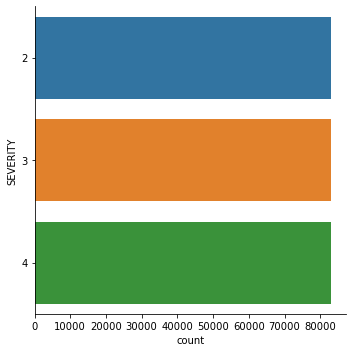

In [40]:
sb.catplot(y = "SEVERITY", data = us_16_acd_ohe_up, kind = "count")

In [41]:
us_16_acd_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248880 entries, 0 to 30355
Data columns (total 80 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   TEMPERATURE                      248880 non-null  float32 
 1   HUMIDITY                         248880 non-null  float32 
 2   PRESSURE                         248880 non-null  float32 
 3   WIND_SPEED                       248880 non-null  float32 
 4   SIDE_L                           248880 non-null  float64 
 5   SIDE_R                           248880 non-null  float64 
 6   STATE_Alabama                    248880 non-null  float64 
 7   STATE_Arizona                    248880 non-null  float64 
 8   STATE_Arkansas                   248880 non-null  float64 
 9   STATE_California                 248880 non-null  float64 
 10  STATE_Colorado                   248880 non-null  float64 
 11  STATE_Connecticut                248880 non-null  flo

Export the upsampled (plus encoded) dataset so that we can use it later.

In [42]:
us_16_acd_ohe_up.to_csv('us_16_acd_ohe_up.csv', index=False)

## DecisionTreeClassifier (upsampled data)

We now use the upsampled data to perform ```DecisionTreeClassifier``` again. The steps are exactly the same as what we did just now using the initial data.

[Text(0.5, 0.9, 'SIDE_L <= 0.5\ngini = 0.667\nsamples = 199104\nvalue = [66444, 66339, 66321]\nclass = 2'),
 Text(0.25, 0.7, 'STATE_California <= 0.5\ngini = 0.663\nsamples = 170758\nvalue = [60763, 61419, 48576]\nclass = 3'),
 Text(0.125, 0.5, 'STATE_Texas <= 0.5\ngini = 0.664\nsamples = 133806\nvalue = [39667, 50164, 43975]\nclass = 3'),
 Text(0.0625, 0.3, 'DAY_NIGHT_Day <= 0.5\ngini = 0.665\nsamples = 117480\nvalue = [35865, 39570, 42045]\nclass = 4'),
 Text(0.03125, 0.1, 'gini = 0.629\nsamples = 39441\nvalue = [7853, 12967, 18621]\nclass = 4'),
 Text(0.09375, 0.1, 'gini = 0.665\nsamples = 78039\nvalue = [28012, 26603, 23424]\nclass = 2'),
 Text(0.1875, 0.3, 'DAY_NIGHT_Day <= 0.5\ngini = 0.511\nsamples = 16326\nvalue = [3802, 10594, 1930]\nclass = 3'),
 Text(0.15625, 0.1, 'gini = 0.496\nsamples = 5564\nvalue = [868, 3730, 966]\nclass = 3'),
 Text(0.21875, 0.1, 'gini = 0.511\nsamples = 10762\nvalue = [2934, 6864, 964]\nclass = 3'),
 Text(0.375, 0.5, 'DAY_NIGHT_Day <= 0.5\ngini = 0.56

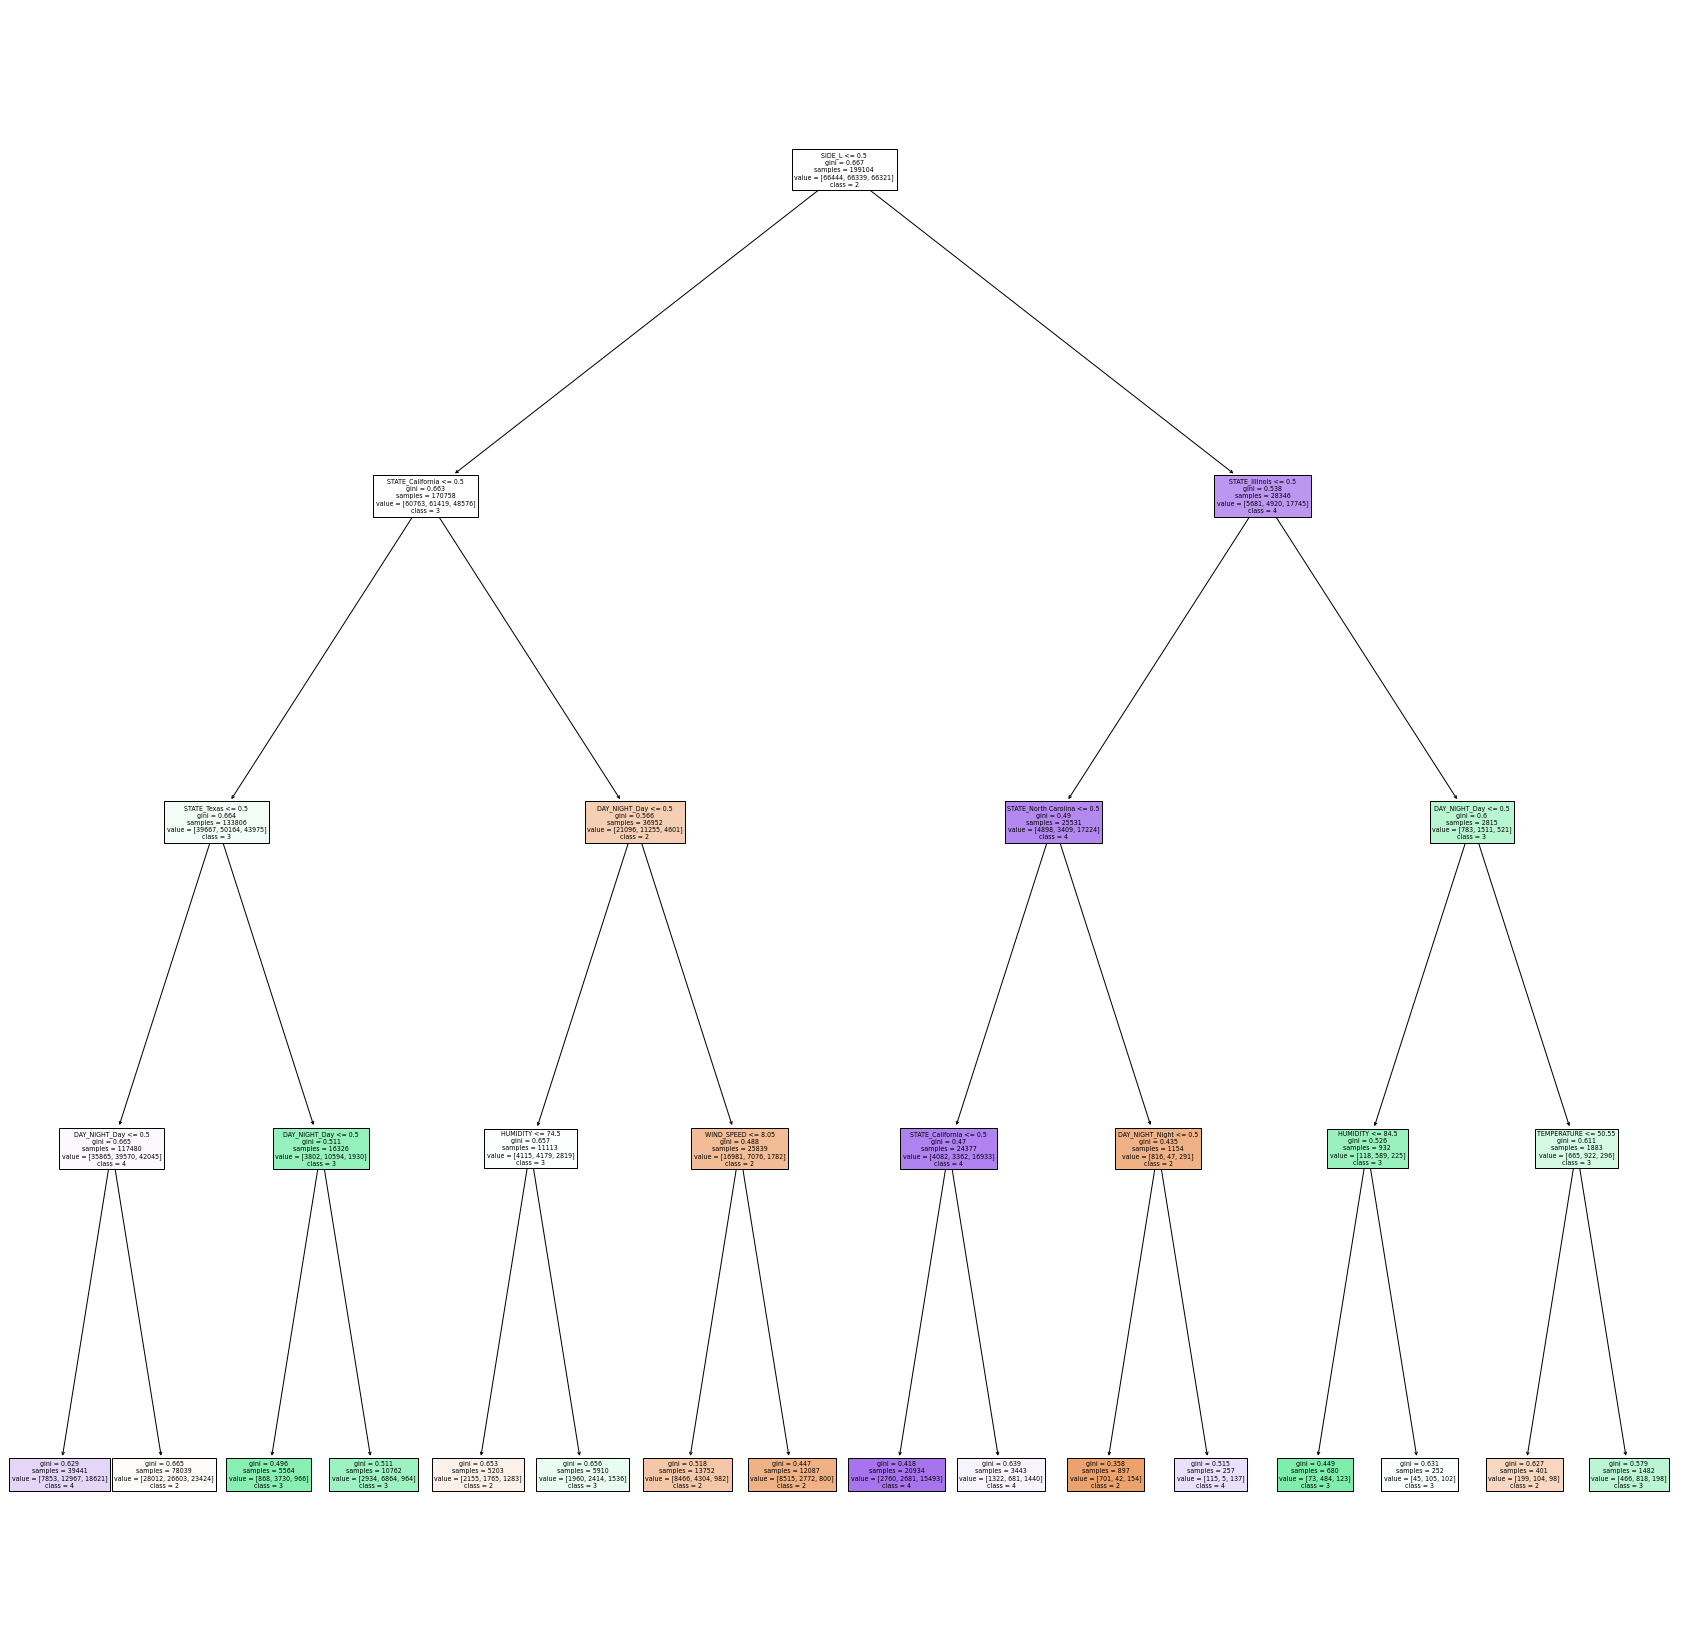

In [43]:
y = pd.DataFrame(us_16_acd_ohe_up["SEVERITY"])
X = pd.DataFrame(us_16_acd_ohe_up.drop("SEVERITY", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

dectree=DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train, y_train)

f=plt.figure(figsize=(30,30))
plot_tree(dectree, filled=True, feature_names=X_train.columns, class_names=["2", "3", "4"])

Train Data
Accuracy  :	 0.49297854387656703

True 2 Train :	 0.7231352718078382
False 2 Train :	 0.27686472819216185

True 3 Train :	 0.21729299507077285
False 3 Train :	 0.7827070049292272

True 4 Train :	 0.5381553354141222
False 4 Train :	 0.46184466458587775



<AxesSubplot:>

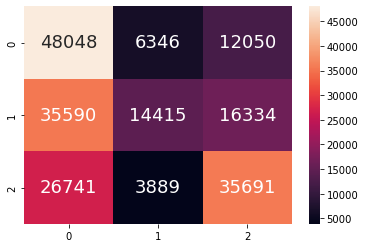

In [44]:
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_2=cmTrain[0][0]
true_3=cmTrain[1][1]
true_4=cmTrain[2][2]
false_2=cmTrain[0][1]+cmTrain[0][2]
false_3=cmTrain[1][0]+cmTrain[1][2]
false_4=cmTrain[2][0]+cmTrain[2][1]

print("True 2 Train :\t", (true_2/(true_2 + false_2)))
print("False 2 Train :\t", (false_2/(true_2 + false_2)))
print()

print("True 3 Train :\t", (true_3/(true_3 + false_3)))
print("False 3 Train :\t", (false_3/(true_3 + false_3)))
print()

print("True 4 Train :\t", (true_4/(true_4 + false_4)))
print("False 4 Train :\t", (false_4/(true_4 + false_4)))
print()

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.4951181292189007

True 2 Test :	 0.7231775248244127
False 2 Test :	 0.27682247517558733

True 3 Test :	 0.22164731363937187
False 3 Test :	 0.7783526863606282

True 4 Test :	 0.5419195865136126
False 4 Test :	 0.4580804134863874



<AxesSubplot:>

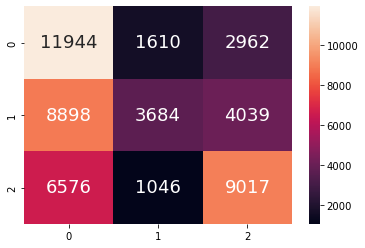

In [45]:
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_2_test=cmTest[0][0]
true_3_test=cmTest[1][1]
true_4_test=cmTest[2][2]
false_2_test=cmTest[0][1]+cmTest[0][2]
false_3_test=cmTest[1][0]+cmTest[1][2]
false_4_test=cmTest[2][0]+cmTest[2][1]

print("True 2 Test :\t", (true_2_test/(true_2_test + false_2_test)))
print("False 2 Test :\t", (false_2_test/(true_2_test + false_2_test)))
print()

print("True 3 Test :\t", (true_3_test/(true_3_test + false_3_test)))
print("False 3 Test :\t", (false_3_test/(true_3_test + false_3_test)))
print()

print("True 4 Test :\t", (true_4_test/(true_4_test + false_4_test)))
print("False 4 Test :\t", (false_4_test/(true_4_test + false_4_test)))
print()

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

We can see that using the upsampled data to perform our classification using decision tree yield lower accuracy compared to using the original data. The bright side is that we now have a result which is less biased towards a specific category. We will now deal with the issue on accuracy.

## Cross-validation (GridSearchCV) on DecisionTreeClassifier

The model performs exhaustive search over specified parameter values for an estimator. Important members are fit, predict.
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

---

What is **cross-validation**?\
Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.\
More details at: https://www.mygreatlearning.com/blog/cross-validation/

In [46]:
y = pd.DataFrame(us_16_acd_ohe_up["SEVERITY"])
X = pd.DataFrame(us_16_acd_ohe_up.drop("SEVERITY", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

We build a ```GridSearchCV``` model, with ```DecisionTreeClassifier``` as our parameter. Other parameters include max_depth of 2 to 10, cv equals to 10-fold and accuracy as the strategy to evaluate the performance.

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(2, 10)}             

svrGrid = GridSearchCV(DecisionTreeClassifier(),   
                      param_grid,                 
                      cv = 10,                     
                      scoring = 'accuracy')       

svrGrid.fit(X_train, y_train.SEVERITY.ravel())

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

We can then obtain the choice and the score for the best model.

In [48]:
print(svrGrid.best_estimator_)

print(np.abs(svrGrid.best_score_))

DecisionTreeClassifier(max_depth=9)
0.5454787314347439


If we increase the cv and param_grid to cross-validate, we can actually obtain a result which yield greater accuracy. However, running with larger parameters will be very time-consuming, and we want to avoid overfitting the data. Therefore, we will choose the parameters as shown above. Some accuracy using different max_depth are shown below:
- max_depth=04 -> +-0.50 accuracy
- max_depth=09 -> +-0.54 accuracy
- max_depth=14 -> +-0.60 accuracy
- max_depth=19 -> +-0.66 accracy

## DecisionTreeClassifier (best model from GridSearchCV)

We now use the optimal parameters we get from cross-validation to perform ```DecisionTreeClassifier``` again. The steps are exactly the same as what we did just now.

[Text(0.5279061284046692, 0.95, 'STATE_California <= 0.5\ngini = 0.667\nsamples = 199104\nvalue = [66446, 66228, 66430]\nclass = 2'),
 Text(0.29486867704280156, 0.85, 'SIDE_L <= 0.5\ngini = 0.661\nsamples = 158551\nvalue = [43976, 54222, 60353]\nclass = 4'),
 Text(0.15856031128404668, 0.75, 'STATE_Texas <= 0.5\ngini = 0.664\nsamples = 133729\nvalue = [39665, 49975, 44089]\nclass = 3'),
 Text(0.08300907911802853, 0.65, 'DAY_NIGHT_Day <= 0.5\ngini = 0.665\nsamples = 117370\nvalue = [35831, 39391, 42148]\nclass = 4'),
 Text(0.041504539559014265, 0.55, 'STATE_Illinois <= 0.5\ngini = 0.628\nsamples = 39606\nvalue = [7846, 12930, 18830]\nclass = 4'),
 Text(0.020752269779507133, 0.45, 'STATE_Pennsylvania <= 0.5\ngini = 0.619\nsamples = 36188\nvalue = [7412, 10494, 18282]\nclass = 4'),
 Text(0.010376134889753566, 0.35, 'STATE_Ohio <= 0.5\ngini = 0.627\nsamples = 34003\nvalue = [7090, 10431, 16482]\nclass = 4'),
 Text(0.005188067444876783, 0.25, 'STATE_Minnesota <= 0.5\ngini = 0.635\nsamples = 

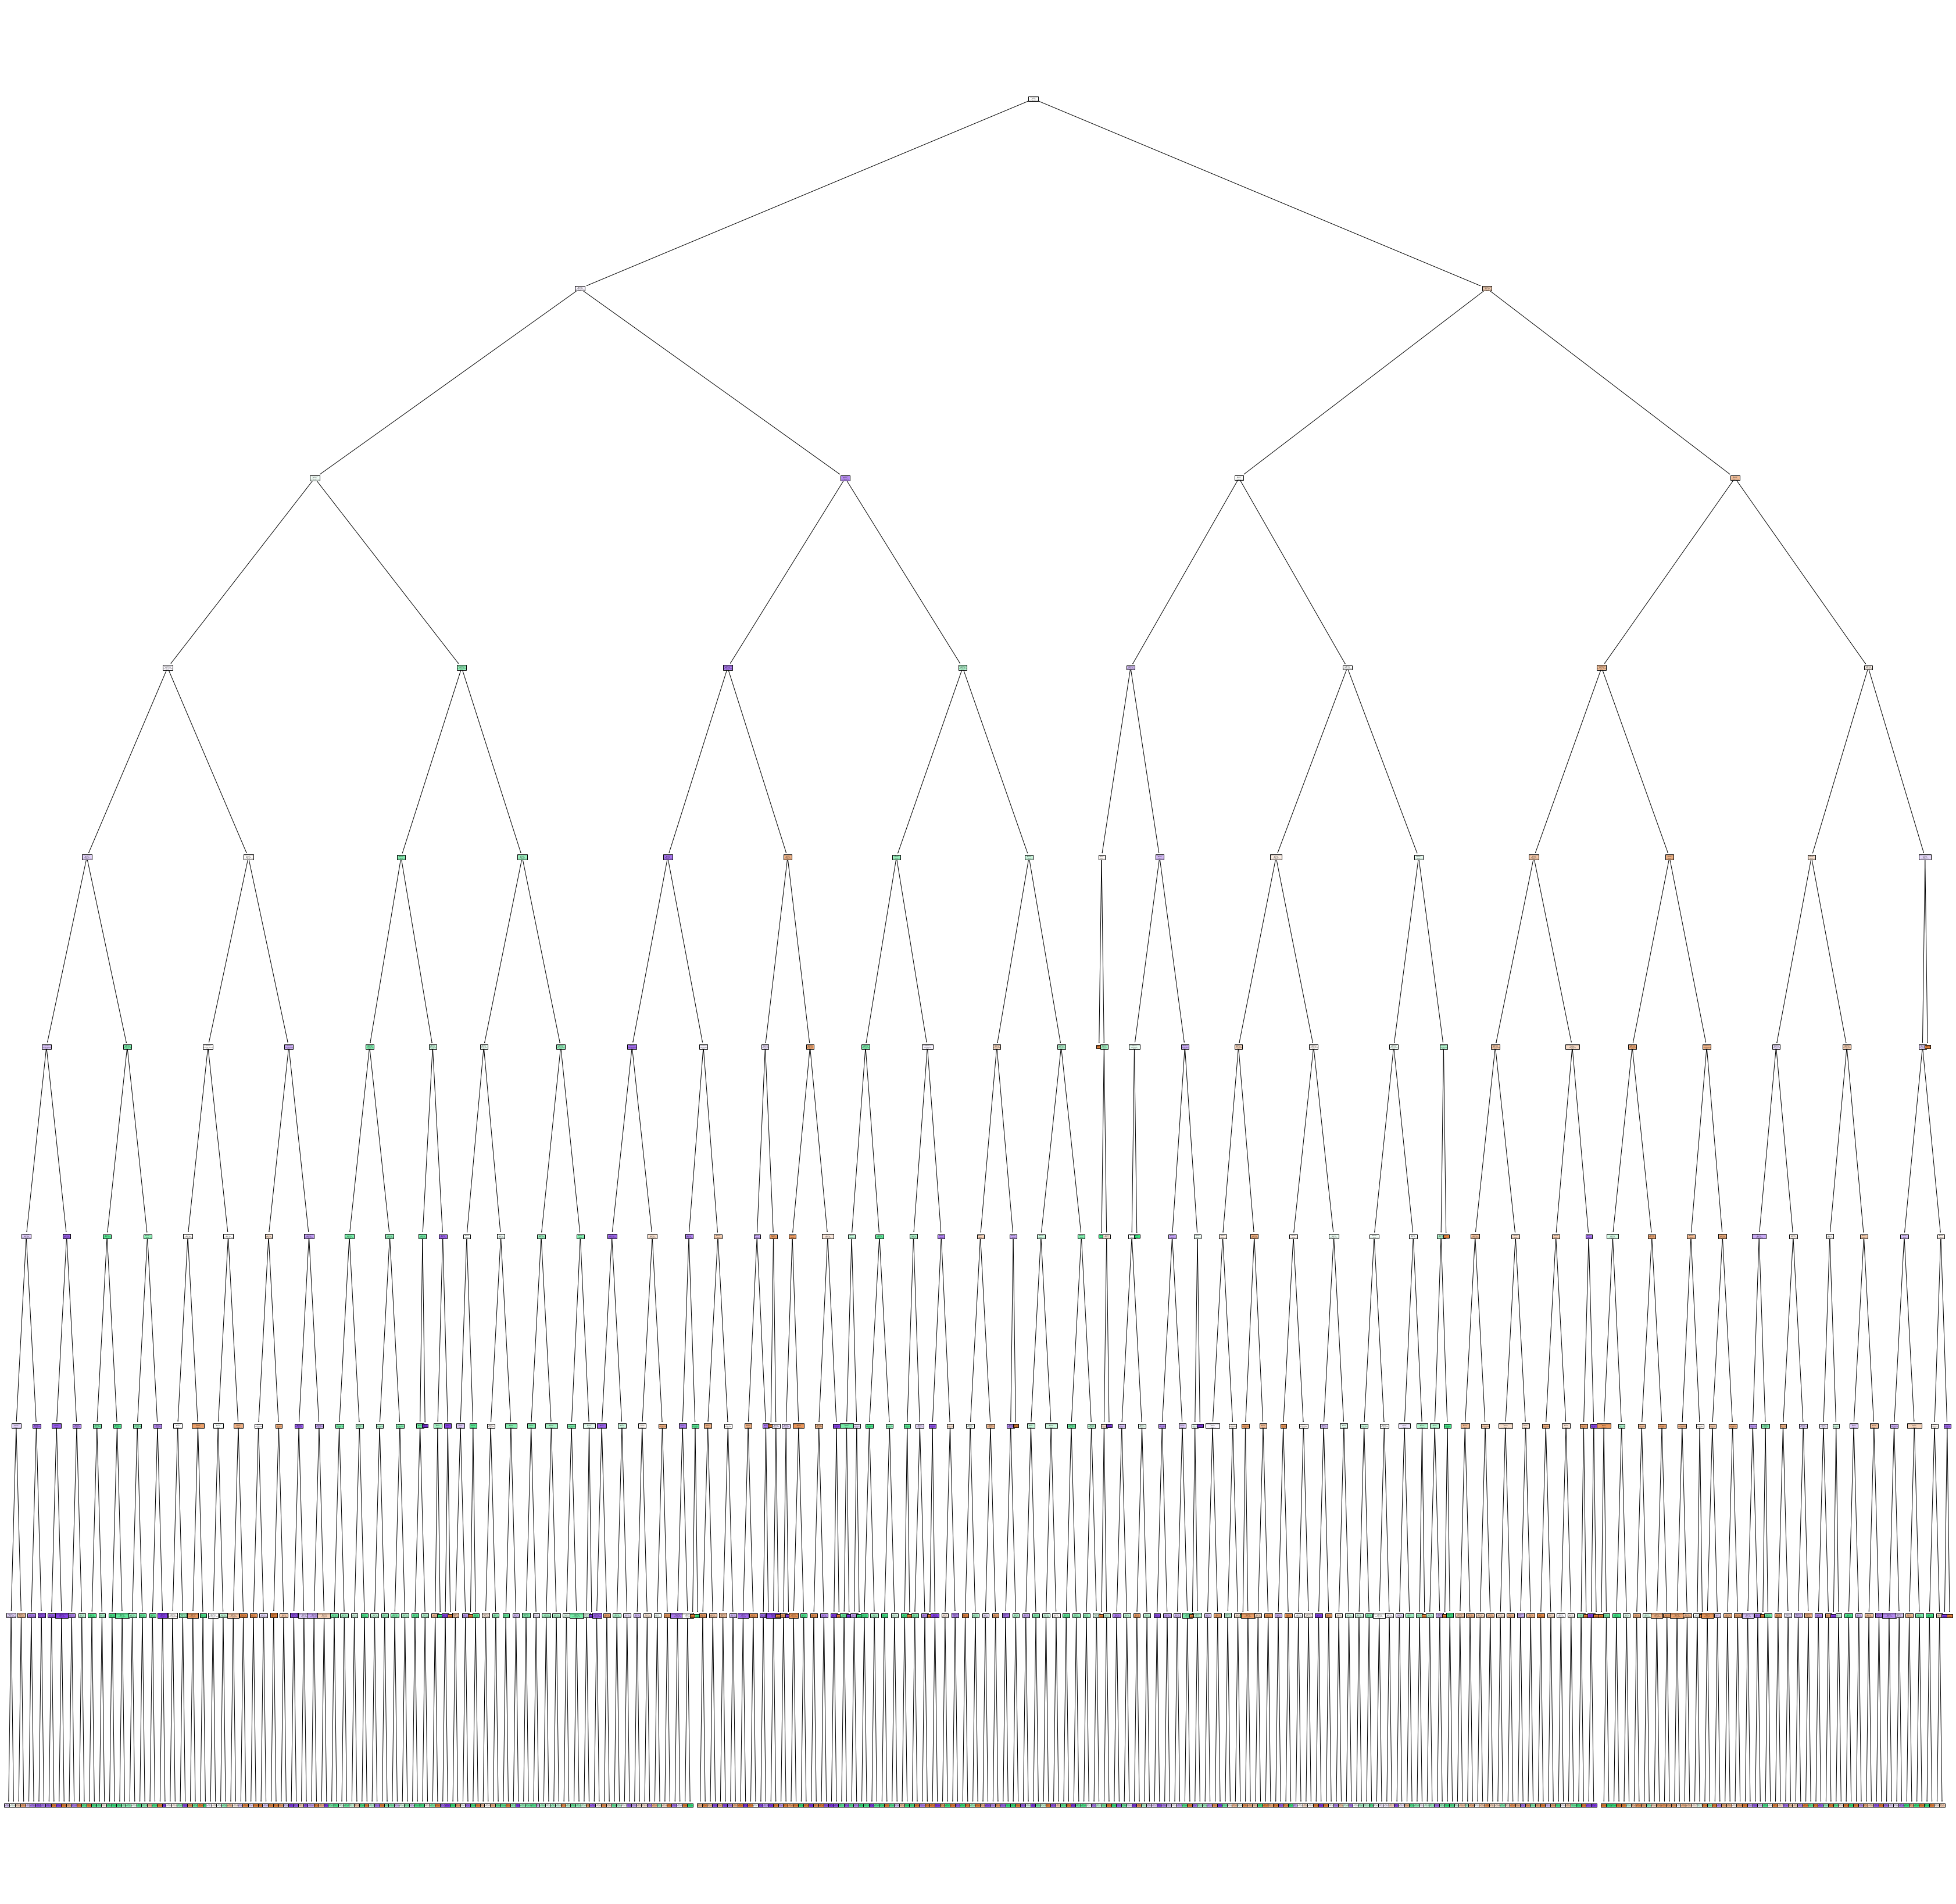

In [49]:
y = pd.DataFrame(us_16_acd_ohe_up["SEVERITY"])
X = pd.DataFrame(us_16_acd_ohe_up.drop("SEVERITY", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

dectree=DecisionTreeClassifier(max_depth=9)
dectree.fit(X_train, y_train)

f=plt.figure(figsize=(60,60))
plot_tree(dectree, filled=True, feature_names=X_train.columns, class_names=["2", "3", "4"])

Train Data
Accuracy  :	 0.5487935953069752

True 2 Train :	 0.48800529753484034
False 2 Train :	 0.5119947024651597

True 3 Train :	 0.3534456725252159
False 3 Train :	 0.646554327474784

True 4 Train :	 0.8043504440764715
False 4 Train :	 0.19564955592352853



<AxesSubplot:>

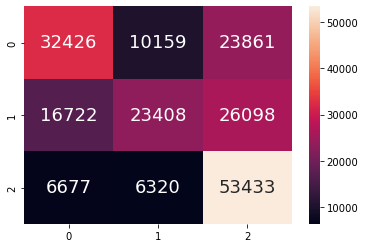

In [50]:
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_2=cmTrain[0][0]
true_3=cmTrain[1][1]
true_4=cmTrain[2][2]
false_2=cmTrain[0][1]+cmTrain[0][2]
false_3=cmTrain[1][0]+cmTrain[1][2]
false_4=cmTrain[2][0]+cmTrain[2][1]

print("True 2 Train :\t", (true_2/(true_2 + false_2)))
print("False 2 Train :\t", (false_2/(true_2 + false_2)))
print()

print("True 3 Train :\t", (true_3/(true_3 + false_3)))
print("False 3 Train :\t", (false_3/(true_3 + false_3)))
print()

print("True 4 Train :\t", (true_4/(true_4 + false_4)))
print("False 4 Train :\t", (false_4/(true_4 + false_4)))
print()

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5454034072645452

True 2 Test :	 0.4858907593556982
False 2 Test :	 0.5141092406443019

True 3 Test :	 0.3527970356203682
False 3 Test :	 0.6472029643796319

True 4 Test :	 0.7998185117967332
False 4 Test :	 0.20018148820326678



<AxesSubplot:>

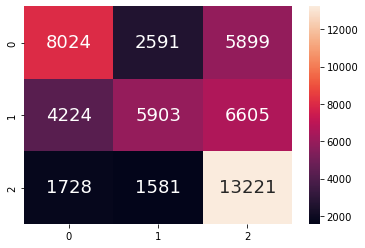

In [51]:
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_2_test=cmTest[0][0]
true_3_test=cmTest[1][1]
true_4_test=cmTest[2][2]
false_2_test=cmTest[0][1]+cmTest[0][2]
false_3_test=cmTest[1][0]+cmTest[1][2]
false_4_test=cmTest[2][0]+cmTest[2][1]

print("True 2 Test :\t", (true_2_test/(true_2_test + false_2_test)))
print("False 2 Test :\t", (false_2_test/(true_2_test + false_2_test)))
print()

print("True 3 Test :\t", (true_3_test/(true_3_test + false_3_test)))
print("False 3 Test :\t", (false_3_test/(true_3_test + false_3_test)))
print()

print("True 4 Test :\t", (true_4_test/(true_4_test + false_4_test)))
print("False 4 Test :\t", (false_4_test/(true_4_test + false_4_test)))
print()

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

By using the parameters we got from cross-validation, we can now build our model which is of higher accuracy. This situation applies to both the train and test data.

## RandomForestClassifier (upsampled data)

We have done ```DecisionTreeClassifier``` above. Now let us use ```RandomForestClassifier``` to build a better model. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. You can imagine that we have a tree previously, but now we have a forest, so that we can now return a result which is more accurate.\
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Similarly, we are going to use all the predictors we have to predict the level of ```SEVERITY``` of accident.

Import the essential libraries.

> RandomForestClassifier: A random forest classifier.

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
y = pd.DataFrame(us_16_acd_ohe_up["SEVERITY"])
X = pd.DataFrame(us_16_acd_ohe_up.drop("SEVERITY", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

Create a ```RandomForestClassifier``` object with the following parameters:
- n_estimators: 100
- max_depth: 4
- Leaving other parameters as default

Fit the model using the **train** data.

In [54]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 4)       

rfc.fit(X_train, y_train.SEVERITY.ravel())

RandomForestClassifier(max_depth=4)

Predict the **train** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual 2   |  True 2   |  False 2  |   False 2   |             
| Actual 3   |  False 3  |  True 3   |   False 3   |  
| Actual 4   |  False 4  |  False 4  |   True 4    |    
|                   | Predicted 2 | Predicted 3 | Predicted 4 |  

Train Data
Accuracy  :	 0.5237112262937962

True 2 Train :	 0.6059532246633593
False 2 Train :	 0.3940467753366407

True 3 Train :	 0.37865702012208907
False 3 Train :	 0.6213429798779109

True 4 Train :	 0.5864663917401644
False 4 Train :	 0.41353360825983565



<AxesSubplot:>

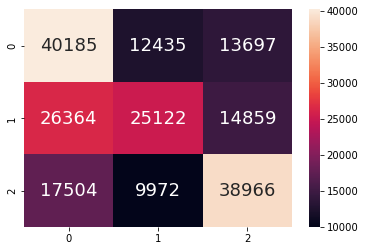

In [55]:
y_train_pred = rfc.predict(X_train)

print("Train Data")
print("Accuracy  :\t", rfc.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_2=cmTrain[0][0]
true_3=cmTrain[1][1]
true_4=cmTrain[2][2]
false_2=cmTrain[0][1]+cmTrain[0][2]
false_3=cmTrain[1][0]+cmTrain[1][2]
false_4=cmTrain[2][0]+cmTrain[2][1]

print("True 2 Train :\t", (true_2/(true_2 + false_2)))
print("False 2 Train :\t", (false_2/(true_2 + false_2)))
print()

print("True 3 Train :\t", (true_3/(true_3 + false_3)))
print("False 3 Train :\t", (false_3/(true_3 + false_3)))
print()

print("True 4 Train :\t", (true_4/(true_4 + false_4)))
print("False 4 Train :\t", (false_4/(true_4 + false_4)))
print()

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Predict the **test** data using the model we trained just now. Plot the **heatmap of confusion matrix**.

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual 2   |  True 2   |  False 2  |   False 2   |             
| Actual 3   |  False 3  |  True 3   |   False 3   |  
| Actual 4   |  False 4  |  False 4  |   True 4    |    
|                   | Predicted 2 | Predicted 3 | Predicted 4 |  


Test Data
Accuracy  :	 0.5212552234008357

True 2 Test :	 0.6050591840413387
False 2 Test :	 0.3949408159586613

True 3 Test :	 0.37718928678904606
False 3 Test :	 0.6228107132109539

True 4 Test :	 0.5817290228841264
False 4 Test :	 0.4182709771158736



<AxesSubplot:>

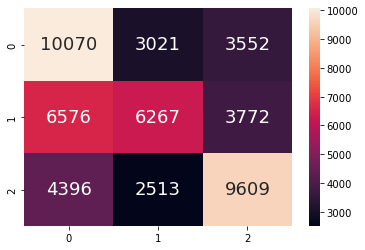

In [56]:
y_test_pred = rfc.predict(X_test)

print("Test Data")
print("Accuracy  :\t", rfc.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_2_test=cmTest[0][0]
true_3_test=cmTest[1][1]
true_4_test=cmTest[2][2]
false_2_test=cmTest[0][1]+cmTest[0][2]
false_3_test=cmTest[1][0]+cmTest[1][2]
false_4_test=cmTest[2][0]+cmTest[2][1]

print("True 2 Test :\t", (true_2_test/(true_2_test + false_2_test)))
print("False 2 Test :\t", (false_2_test/(true_2_test + false_2_test)))
print()

print("True 3 Test :\t", (true_3_test/(true_3_test + false_3_test)))
print("False 3 Test :\t", (false_3_test/(true_3_test + false_3_test)))
print()

print("True 4 Test :\t", (true_4_test/(true_4_test + false_4_test)))
print("False 4 Test :\t", (false_4_test/(true_4_test + false_4_test)))
print()

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

The model we built using ```RandomForestClassifier``` is better in terms of accuracy compared to the one we built using ```DecisionTreeClassifier``` initially. Compared to the cross-validated ```DecisionTreeClassifier``` model, the accuracy of both are roughly the same (though slightly lower for this, might be due to depth of tree used or other parameters). However, do note that for ```DecisionTreeClassifier``` model, we have higher accuracy on *True 4* while for ```RandomForestClassifier```, we have higher accuracy on *True 2*. As a whole, the accuracy for each category is more balanced for ```RandomForestClassifier``` model.

## Cross-validation (GridSearchCV) on RandomForestClassifier

Similarly, we will now perform cross-validation using ```GridSearchCV``` for ```RandomForestClassifier``` to determine the best parameters to be used.

In [57]:
y = pd.DataFrame(us_16_acd_ohe_up["SEVERITY"])
X = pd.DataFrame(us_16_acd_ohe_up.drop("SEVERITY", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

We build a ```GridSearchCV``` model, with ```RandomForestClassifier``` as our parameter. Other parameters include n_estimators of 100 to 500, max_depth of 4 to 10, cv equals to 5-fold and accuracy as the strategy to evaluate the performance. Note that we can actually insrease the range to perform our cross-validation. However, this will require significantly more time for the running of the code.

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(100,501,100), 'max_depth': np.arange(4, 10)}             

svrGrid = GridSearchCV(RandomForestClassifier(),   
                      param_grid,                 
                      cv = 5,                     
                      scoring = 'accuracy')       

svrGrid.fit(X_train, y_train.SEVERITY.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 200, 300, 400, 500])},
             scoring='accuracy')

We can then obtain the choice and the score for the best model.

In [59]:
print(svrGrid.best_estimator_)

print(np.abs(svrGrid.best_score_))

RandomForestClassifier(max_depth=9)
0.5614402719371598


Similar to the case above, if we increase the cv and param_grid to cross-validate, we can actually obtain a result which yield greater accuracy. However, running with larger parameters will be very time-consuming. Therefore, we will choose the parameters as shown above.

## RandomForestClassifier (best model from GridSearchCV)

We now use the optimal parameters we get from cross-validation to perform ```RandomForestClassifier``` again. The steps are exactly the same as what we did just now.

In [60]:
y = pd.DataFrame(us_16_acd_ohe_up["SEVERITY"])
X = pd.DataFrame(us_16_acd_ohe_up.drop("SEVERITY", axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rfc = RandomForestClassifier(n_estimators = 400, max_depth = 9)       
rfc.fit(X_train, y_train.SEVERITY.ravel())

RandomForestClassifier(max_depth=9, n_estimators=400)

Train Data
Accuracy  :	 0.566683743169399

True 2 Train :	 0.6011631419939577
False 2 Train :	 0.3988368580060423

True 3 Train :	 0.46578144032241087
False 3 Train :	 0.5342185596775891

True 4 Train :	 0.6333559219938257
False 4 Train :	 0.3666440780061742



<AxesSubplot:>

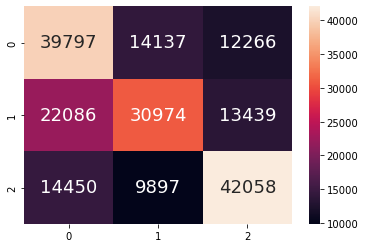

In [61]:
y_train_pred = rfc.predict(X_train)

print("Train Data")
print("Accuracy  :\t", rfc.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
true_2=cmTrain[0][0]
true_3=cmTrain[1][1]
true_4=cmTrain[2][2]
false_2=cmTrain[0][1]+cmTrain[0][2]
false_3=cmTrain[1][0]+cmTrain[1][2]
false_4=cmTrain[2][0]+cmTrain[2][1]

print("True 2 Train :\t", (true_2/(true_2 + false_2)))
print("False 2 Train :\t", (false_2/(true_2 + false_2)))
print()

print("True 3 Train :\t", (true_3/(true_3 + false_3)))
print("False 3 Train :\t", (false_3/(true_3 + false_3)))
print()

print("True 4 Train :\t", (true_4/(true_4 + false_4)))
print("False 4 Train :\t", (false_4/(true_4 + false_4)))
print()

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5648505303760849

True 2 Test :	 0.5954653937947494
False 2 Test :	 0.4045346062052506

True 3 Test :	 0.4681368082133528
False 3 Test :	 0.5318631917866472

True 4 Test :	 0.6300211416490487
False 4 Test :	 0.3699788583509514



<AxesSubplot:>

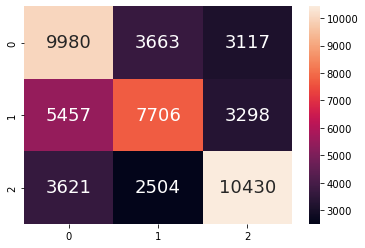

In [62]:
y_test_pred = rfc.predict(X_test)

print("Test Data")
print("Accuracy  :\t", rfc.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
true_2_test=cmTest[0][0]
true_3_test=cmTest[1][1]
true_4_test=cmTest[2][2]
false_2_test=cmTest[0][1]+cmTest[0][2]
false_3_test=cmTest[1][0]+cmTest[1][2]
false_4_test=cmTest[2][0]+cmTest[2][1]

print("True 2 Test :\t", (true_2_test/(true_2_test + false_2_test)))
print("False 2 Test :\t", (false_2_test/(true_2_test + false_2_test)))
print()

print("True 3 Test :\t", (true_3_test/(true_3_test + false_3_test)))
print("False 3 Test :\t", (false_3_test/(true_3_test + false_3_test)))
print()

print("True 4 Test :\t", (true_4_test/(true_4_test + false_4_test)))
print("False 4 Test :\t", (false_4_test/(true_4_test + false_4_test)))
print()

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

By using the parameters we got from cross-validation, we can now build our model which is of higher accuracy. This situation applies to both the train and test data.